# **Weather Forecasting Project**

Statistical Models for Data Science,

Marco Colognesi - VR495478


## **Loading, Converting and Cleaning of the Data**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The project starts with the **loading**, **converting** and **cleaning** of the data:
* Data is imported with the `pd.read_csv` method: the `['date']` column is **parsed** into a `'datetime64[ns]'` format thanks to the `parse_dates` option and is going to be used as a `DatetimeIndex`, the ideal type of index for a **time series analysis**.
* The **frequency** of the data is specified thanks to the `.asfreq()` method: in particular, our data shows a **calendar day frequency** (*daily*).

In [5]:
# Importing Training Data
train_data = pd.read_csv(
            filepath_or_buffer='raw_data\Weather ForecastingTrain.csv',
            # Parsing dates and using ['date'] as column
            parse_dates=['date'], index_col=['date']
            )

# Specifying the frequency as daily --> ('D') = calendar day frequency
train_data = train_data.asfreq('D')

# Showing a snippet of the data
display(train_data)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762


In [7]:
# Importing Testing Data
test_data = pd.read_csv(
            filepath_or_buffer='raw_data\Weather ForecastingTest.csv',
            # Parsing dates and using ['date'] as column
            parse_dates=['date'], index_col=['date']
            )

# Specifying the frequency as daily --> ('D') = calendar day frequency
test_data = test_data.asfreq('D')

# Showing a snippet of the data
display(test_data)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-03-27,29.500000,38.625000,13.650000,1009.500000
2017-03-28,29.888889,40.666667,8.844444,1009.000000
2017-03-29,31.000000,34.500000,13.200000,1007.125000


Our **training dataset** provides **daily data** from the *1st of January 2013* to the *31st of December 2016*: a total of `1461` **observations**.

There are **4 parameters** (*columns*) describing weather, that are: `meantemp` (*which will be used as dependent variable for the forecast*), `humidity`, `wind_speed`, and `meanpressure`.

Instead, the **testing dataset** provides **daily data** from the ***first three-month period of 2017***: from 1st of January 2017 to the 31st of March 2017, a total of `90` **observations**.


In [30]:
# Data information
print('=== Train Data Information ===')
print(train_data.info())

=== Train Data Information ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [31]:
print('=== Test Data Information ===')
print(test_data.info())

=== Test Data Information ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2017-01-01 to 2017-03-31
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      90 non-null     float64
 1   humidity      90 non-null     float64
 2   wind_speed    90 non-null     float64
 3   meanpressure  90 non-null     float64
dtypes: float64(4)
memory usage: 3.5 KB
None


To perform the **data cleaning** part, the presence of **null values** needs to be assessed: this can be done thanks to the `.isnull()` method.

In [35]:
# Checking if there are nulle values in the training data (NaN)
print('Null values in the training dataset:\n', train_data.isnull().sum())

print('\nNull values in the testing dataset:\n', train_data.isnull().sum())

Null values in the training dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Null values in the testing dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


There are **no null values** in our training data, thus no data cleaning operations is required at the moment.

For data visualization purposes two new columns are added:

* `'Month`: indicating the **monthly period** (*year and month*)
* `'Year`: indicating the **year period**

In [36]:
# Adding 'Month' column (DatetimeIndex -> Period)
train_data['Month'] = train_data.index.to_period('M')
# Adding 'Year' column (DatetimeIndex -> Period)
train_data['Year'] = train_data.index.to_period('Y')

# Showing snippet of the data
display(train_data)

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01,2013
...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,2016-12,2016
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12,2016
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12,2016


## **Exploring the dataset**

The `.describe()` method is used to represent the basic **central tendency measures**: `mean`, `standard deviation`, `min`, `max`, `percentiles` (*25%, 50%, 75%*).

In [72]:
display(train_data.describe()[1:].T) # --> Slicing [1:] is used to avoid showing 'count' column (useless in our case)

,mean,std,min,25%,50%,75%,max
meantemp,25.506127,7.339416,6.000000,18.857143,27.714286,31.3125,38.714286
humidity,60.744851,16.743928,13.428571,50.375000,62.625000,72.1250,98.000000
wind_speed,6.806865,4.559688,0.000000,3.475000,6.250000,9.2500,42.220000
meanpressure,1011.101197,180.293335,-3.041667,1001.571429,1008.555556,1014.9375,7679.333333


* `"meantemp"` variable ranges from a **minimum** of `6°` to a **maximum** of `38.7°`, resulting in an **average** of `25.5°` degrees and a **standard deviation** of `7.34°`. It represents the *average daily temperature* and appears to be measured in *celsius*. This variable shows no particular values and seems already suitable

* `"humidity"`variable ranges from a **minimum** of `13.43` to a **maximum** of `98`, resulting in an **average** of `60.74` degrees and a **standard deviation** of `16.74`. It represents the *average daily relative humidity percentage*. The average value seems ok, however, the minimum value seems strange so the performance of an **outlier analysis** is required. For more information about the subject check: https://en.wikipedia.org/wiki/Humidity#Relative_humidity

* `"wind_speed"`variable ranges from a **minimum** of `0` to a **maximum** of `42.2`, resulting in an **average** of `6.8` and a **standard deviation** of `4.56`. It represents the *average daily wind speed* and is usually expressed in miles/kilometres per hour or metre per second (*this last one seems to be our case*). The average value seems ok (*might be a little high*), however, the maximum value seems strange so the performance of an **outlier analysis** is required. For more information about the subject check: https://en.wikipedia.org/wiki/Wind_speed

* `"meanpressure"`variable ranges from a **minimum** of `-3.04` to a **maximum** of `7679.33`, resulting in an **average** of `1011.10` and a **standard deviation** of `180.29`. It represents the *average daily atmospheric pressure* and is usually expressed in units of hectopascals (hPa) or millibars (mb). The average value seems ok, however, both the minimum and maximum values seems to be completely wrong so the performance of an **outlier analysis** is required. For more information about the subject check: https://en.wikipedia.org/wiki/Atmospheric_pressure

### **Outlier Detection**

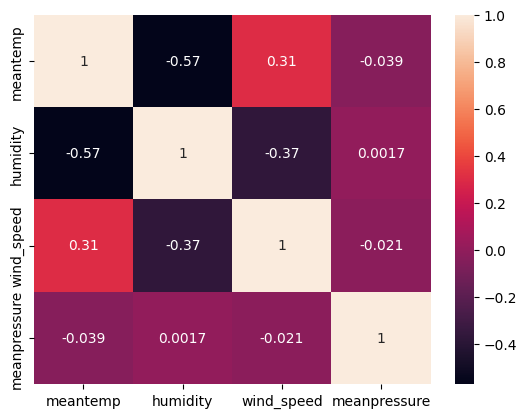

In [61]:
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='rocket')
plt.show()

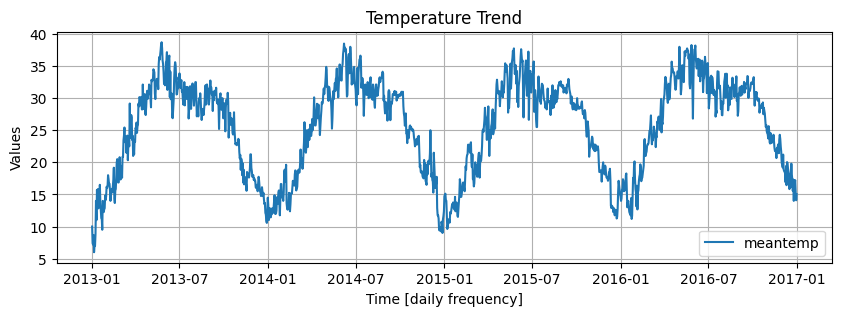

In [77]:
plt.figure(figsize=(10,3))
plt.grid()
plt.plot(train_data['meantemp'], label='meantemp')
plt.title('Temperature Trend')
plt.xlabel('Time [daily frequency]')
plt.ylabel('Values')
plt.legend(loc='lower right')
plt.show()

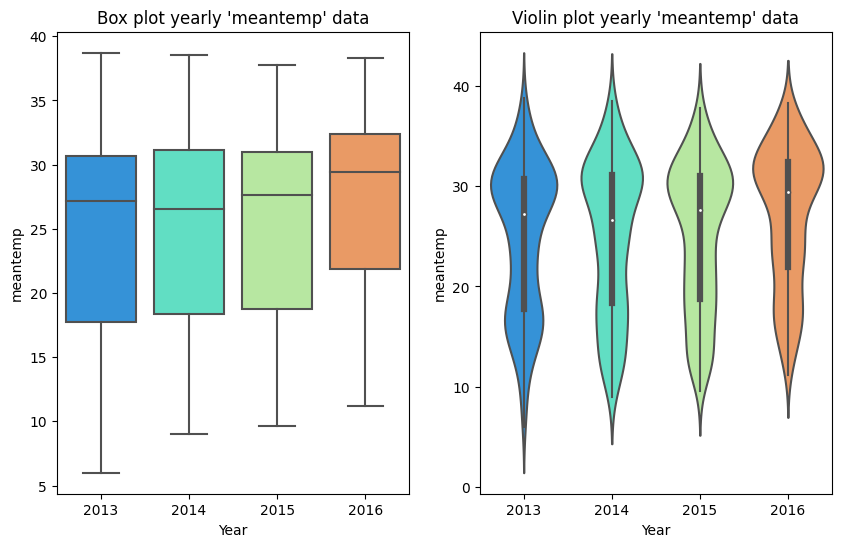

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.boxplot(data=data, x='Year', y='meantemp', palette='rainbow', ax=ax[0]).set_title("Box plot yearly 'meantemp' data")
sns.violinplot(data=data, x='Year', y='meantemp', palette='rainbow', ax=ax[1]).set_title("Violin plot yearly 'meantemp' data")
plt.show()

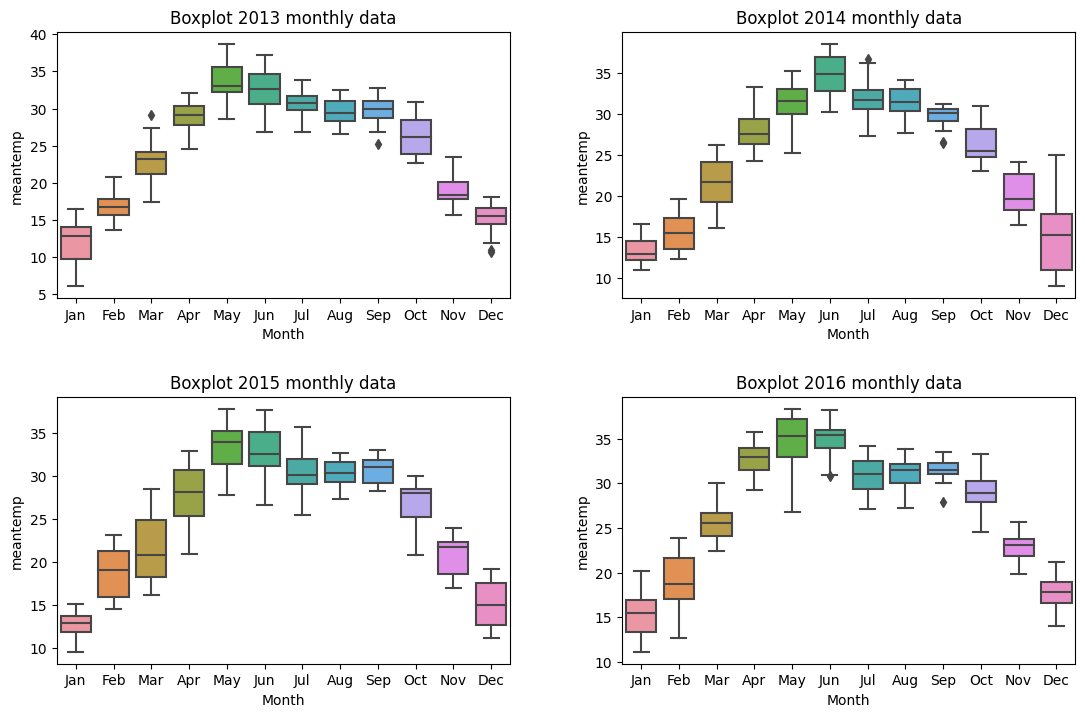

In [41]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
fig.tight_layout(pad=5)
sns.boxplot(x= data[data.index.year == 2013]['Month'].dt.strftime('%b'), y= data[data.index.year == 2013]['meantemp'], ax=axes[0,0]).set_title('Boxplot 2013 monthly data')
sns.boxplot(x= data[data.index.year == 2014]['Month'].dt.strftime('%b'), y= data[data.index.year == 2014]['meantemp'], ax=axes[0,1]).set_title('Boxplot 2014 monthly data')
sns.boxplot(x= data[data.index.year == 2015]['Month'].dt.strftime('%b'), y= data[data.index.year == 2015]['meantemp'], ax=axes[1,0]).set_title('Boxplot 2015 monthly data')
sns.boxplot(x= data[data.index.year == 2016]['Month'].dt.strftime('%b'), y= data[data.index.year == 2016]['meantemp'], ax=axes[1,1]).set_title('Boxplot 2016 monthly data')
plt.show()

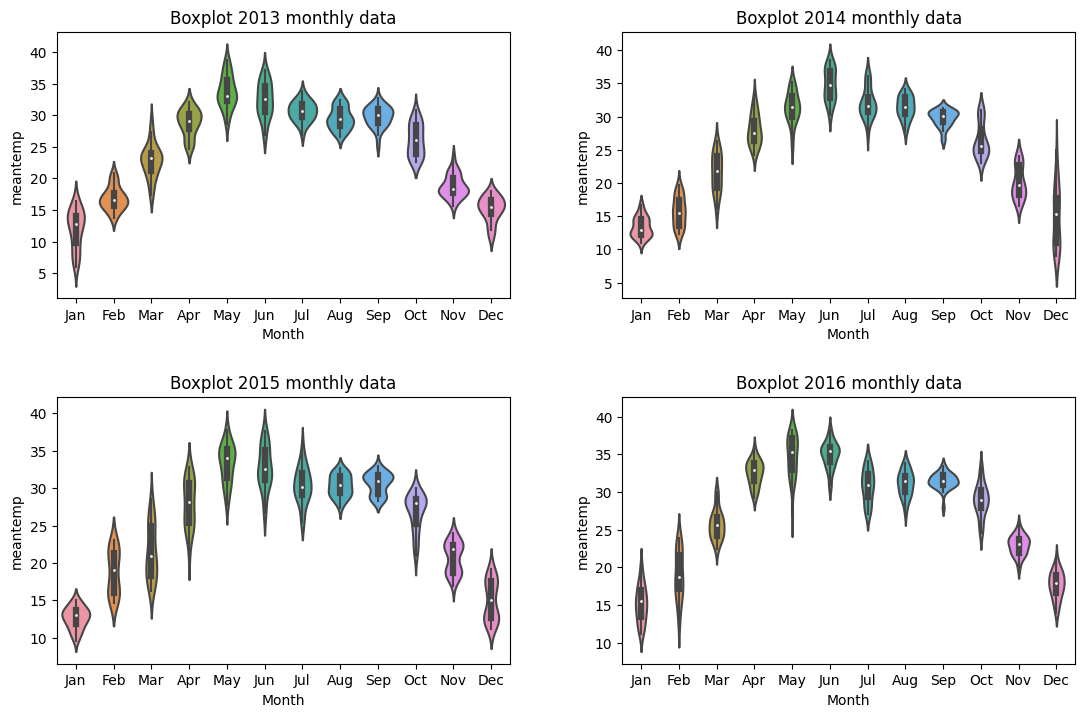

In [25]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
fig.tight_layout(pad=5)
sns.violinplot(x= data[data.index.year == 2013]['Month'].dt.strftime('%b'), y= data[data.index.year == 2013]['meantemp'], ax=axes[0,0]).set_title('Boxplot 2013 monthly data')
sns.violinplot(x= data[data.index.year == 2014]['Month'].dt.strftime('%b'), y= data[data.index.year == 2014]['meantemp'], ax=axes[0,1]).set_title('Boxplot 2014 monthly data')
sns.violinplot(x= data[data.index.year == 2015]['Month'].dt.strftime('%b'), y= data[data.index.year == 2015]['meantemp'], ax=axes[1,0]).set_title('Boxplot 2015 monthly data')
sns.violinplot(x= data[data.index.year == 2016]['Month'].dt.strftime('%b'), y= data[data.index.year == 2016]['meantemp'], ax=axes[1,1]).set_title('Boxplot 2016 monthly data')
plt.show()

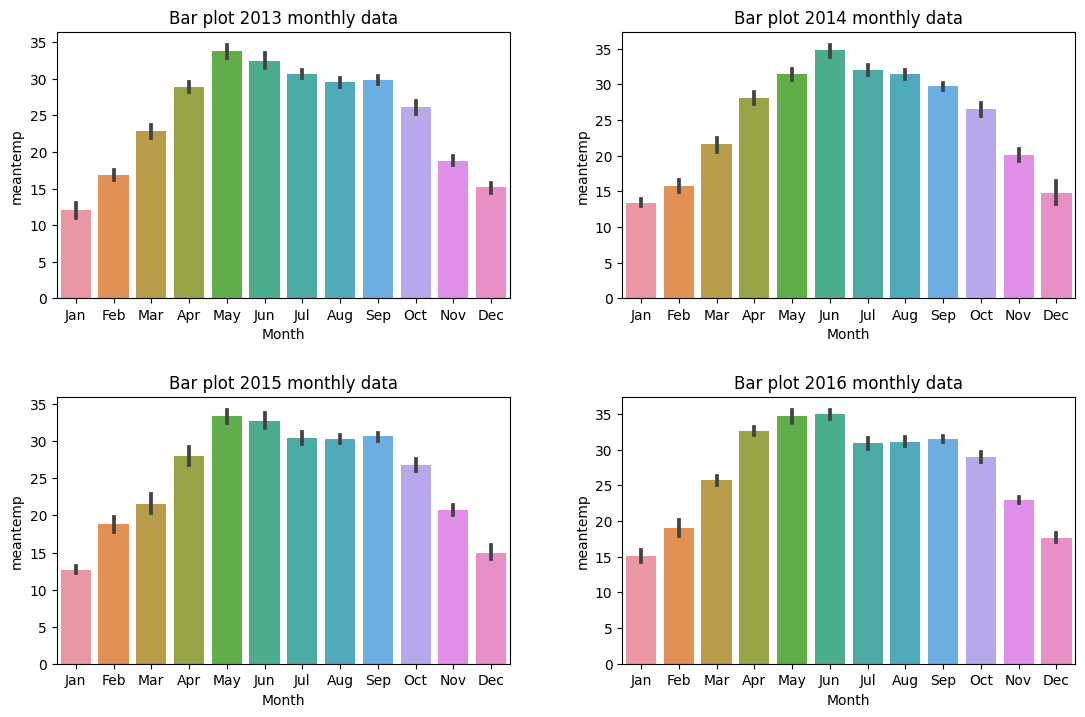

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
fig.tight_layout(pad=5)
sns.barplot(x= data[data.index.year == 2013]['Month'].dt.strftime('%b'), y= data[data.index.year == 2013]['meantemp'], ax=axes[0,0]).set_title('Bar plot 2013 monthly data')
sns.barplot(x= data[data.index.year == 2014]['Month'].dt.strftime('%b'), y= data[data.index.year == 2014]['meantemp'], ax=axes[0,1]).set_title('Bar plot 2014 monthly data')
sns.barplot(x= data[data.index.year == 2015]['Month'].dt.strftime('%b'), y= data[data.index.year == 2015]['meantemp'], ax=axes[1,0]).set_title('Bar plot 2015 monthly data')
sns.barplot(x= data[data.index.year == 2016]['Month'].dt.strftime('%b'), y= data[data.index.year == 2016]['meantemp'], ax=axes[1,1]).set_title('Bar plot 2016 monthly data')
plt.show()

In [79]:
Q1 = np.quantile(train_data['meanpressure'], 0.25)
Q3 = np.quantile(train_data['meanpressure'], 0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - 1.5*IQR
Upper_Fence = Q3 + 1.5*IQR

T = []
for i in train_data['meanpressure']:
    exp1 = i < Lower_Fence
    exp2 = i > Upper_Fence
    if exp1 or exp2:
       outlier = i
       T.append(outlier)

print('Outliers:', T)

Outliers: [7679.333333333333, 938.0666666666668, 946.3125, 310.4375, 633.9, -3.0416666666666665, 1352.6153846153843, 1350.2962962962963, 12.045454545454543]


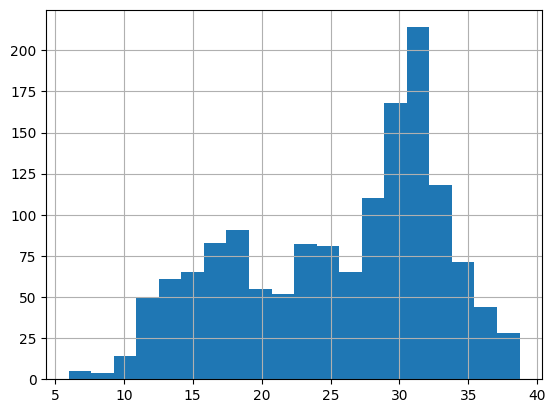

In [61]:
plt.hist(data['meantemp'], bins=20)
plt.grid()
plt.show()